In [1]:
import pandas_datareader as pdr

/home/mo/miniconda3/envs/algo/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
import datetime

In [3]:
import numpy as np

In [4]:
import statsmodels.api 

In [5]:
ticker = 'NFLX'

In [6]:
ohlcv = pdr.get_data_yahoo(ticker, datetime.date.today()- datetime.timedelta(1025), datetime.date.today())

In [7]:
ohlcv

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-18,185.449997,182.729996,183.610001,184.619995,5359600,184.619995
2017-09-19,186.229996,184.169998,184.979996,185.679993,4982100,185.679993
2017-09-20,186.500000,183.199997,186.100006,185.509995,4625000,185.509995
2017-09-21,189.949997,184.509995,185.820007,188.779999,7148100,188.779999
2017-09-22,189.850006,186.389999,188.399994,187.350006,5464300,187.350006
...,...,...,...,...,...,...
2020-07-01,488.230011,454.000000,454.000000,485.640015,9705900,485.640015
2020-07-02,492.279999,475.529999,485.640015,476.890015,6351500,476.890015
2020-07-06,499.500000,479.799988,480.769989,493.809998,7839000,493.809998


In [8]:
def ATR(DF, n):
    df = DF.copy()
    df["H-L"] = abs(df["High"] - df["Low"])
    df["H-PC"] = abs(df["High"] - df["Adj Close"].shift(1))
    df["L-PC"] = abs(df["Low"] - df["Adj Close"].shift(1))
    df["TR"] = df[["H-L","H-PC", "L-PC"]].max(axis=1, skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df2 = df.drop(["H-L","H-PC", "L-PC"], axis=1)
    return df2 
    

In [9]:
atr = ATR(ohlcv, 20)

In [10]:
def OBV(DF):
    df = DF.copy()
    df['daily_ret'] = df['Adj Close'].pct_change()
    df['direction'] = np.where(df['daily_ret'] >= 0, 1, -1)
    df['direction'][0]  = 0
    df['vol_adj'] = df['Volume'] ^ df['direction']
    df['obv'] = df['vol_adj'].cumsum()
    return df['obv']

In [11]:
obv = OBV(ohlcv)

<ipython-input-10-5fcde93b741c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['direction'][0]  = 0


In [12]:
obv

Date
2017-09-18      5359600
2017-09-19     10341701
2017-09-20      5716700
2017-09-21     12864801
2017-09-22      7400500
                ...    
2020-07-01    210035323
2020-07-02    203683822
2020-07-06    211522823
2020-07-07    205858522
2020-07-08    206309937
Name: obv, Length: 706, dtype: int64

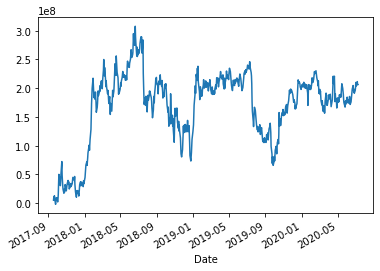

In [13]:
obv.plot()